## MLBA Assignment1 
* 繳交格式：hw1_學號.pdf
* 期限：2020-09-24 18:00
* 可以用**任何方法**把程式及數學題合併成一份pdf檔繳交


### **Question 1 (40%)**
**範例：** 繪製今年GOOGLE收盤價

In [1]:
import datetime as dt # 處理時間
import pandas_datareader.data as web # 抓取經濟數據
import matplotlib.pyplot as plt

In [2]:
start = dt.datetime(2020,1,1) # 起始日期
end = dt.date.today() # 結束日期
mystock = ['GOOG','0050.TW'] # 股票

可使用以下兩種方法`get_data_yahoo`及`DataReader`從yahoo獲取股票資料

In [3]:
df1 = web.get_data_yahoo(mystock[0], start, end)
df2 = web.DataReader(mystock[1], 'yahoo', start, end)

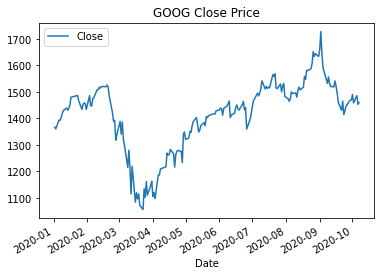

In [4]:
df1[['Close']].plot(title=f'{mystock[0]} Close Price')

* 請以上述例子，建一個繪製股票收盤價的函式`stockplot`

  *  **hint:** `def stockplot(股票, 起始日期, 結束日期)`

  * 輸入日期格式若為字串，可使用`strptime`或其他方式，把字串轉換成時間。  
  `datetime.strptime('年-月-日', '%Y-%m-%d').date()`

  * 可使用`type`檢查變數型態。

 並在一張圖上畫出任意3支股票2019年至今的收盤價(Close)。
 
<br>

* 延續上題，請使用**`for`迴圈**，畫出任意3支股票的開盤價(Open)、收盤價(Close)、最高價(High)、最低價(Low)，共四張圖。


### Answer 1
*以呈現完整資訊為主，圖形美觀不計入分數考量*

* 股票函數 `stockplot` **(5%)**

In [5]:
def stockplot(stock_name, start_day, end_day, price_type): 
  for num in range(len(stock_name)):
    stock_data = web.DataReader(stock_name[num], 'yahoo', start_day, end_day)
    plt.plot(stock_data[price_type]) 
  plt.legend(stock_name) 
  plt.title(f'{price_type} Price') 
  plt.xlabel("Date") 
  plt.ylabel("Price") 
  plt.xticks(rotation=40)
  plt.show()

* 繪圖 多支股票收盤價比較 **(15%)**

In [11]:
start = dt.datetime(2019,1,1) 
end = dt.date.today()
mystock = ['PG','BAT','BA']

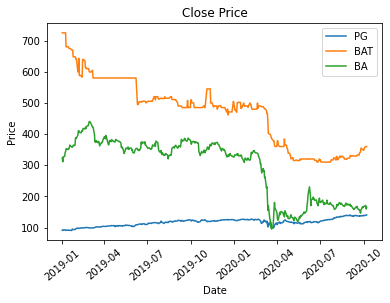

In [12]:
stockplot(mystock, start, end, "Close")

* 迴圈 **(20%)**

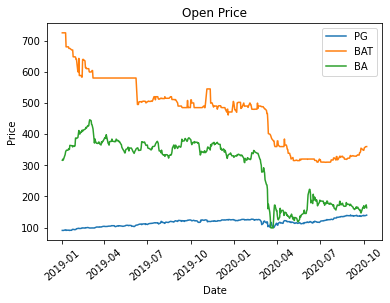

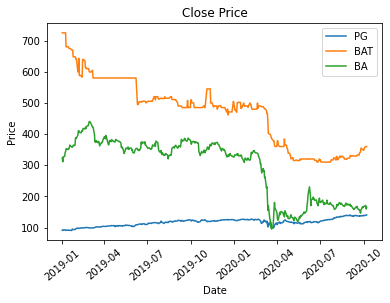

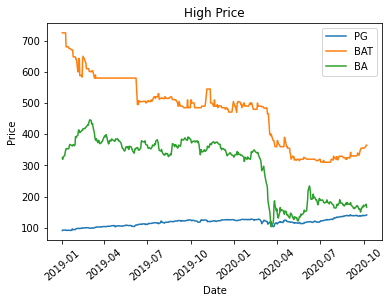

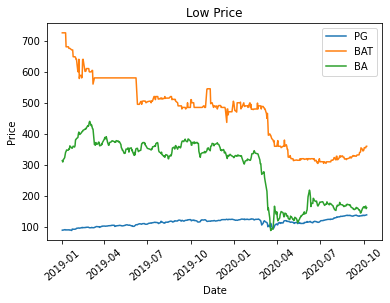

In [14]:
price = ["Open","Close","High","Low"] 
for i in price:
    stockplot(mystock, start, end, i)

### **Question 2 (15%)**
Anny和En上完商管機器學習助教課心很累，肚子很餓，在想要不要去買個紅豆餅當宵夜。
我們決定用感知器來做決定，會受Anny是否想吃、En是否想吃、Sunny是否晚下課，三個因素所影響。

* Decision: 
    是否買紅豆餅當宵夜？

* Inputs:  
    x1 = 1 # Anny想吃  
    x2 = 0 # En不想吃  
    x3 = 1 # Sunny沒有準時下課  

* Weights:  
    w1 = 0.9 # Anny想吃，沒有人可以阻止她  
    w2 = 0.3 # En的意見沒那麼重要  
    w3 = -0.4 # Sunny晚下課，大家都想回家洗洗睡 
     
* Bias: 
  -0.2

請建出一個`snack(x1, x2, x3)`感知器函數，並得出結論。

### Answer 2

* 宵夜感知器 `snack` **(10%)**

In [15]:
import numpy as np

In [27]:
def snack(x1,x2,x3):
  x = np.array([x1, x2, x3])
  w = np.array([0.9, 0.3, -0.4]) 
  b = -0.2
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return print("不買􏰀􏰁􏰂􏰃︎︎︎︎") 
  else:
    return print("􏰁􏰂􏰃︎︎︎買")

* 是否買宵夜? **(5%)**  
 `snack(1, 0, 1)`

In [28]:
snack(1, 0, 1)

􏰁􏰂􏰃︎︎︎買


### **Question 3 (20%)**
呈上題，建一個兩層的神經網路`snack_network(1, 0.5, 0.8)`  

* 第一層：  
$0.9x_{11}+0.2x_{12}-0.5x_{13}+0.1=a_{11}$  
$0.3x_{11}+0.6x_{12}-0.2x_{13}+0.2=a_{12}$  
以`relu`函數輸出，並輸入下一層。

* 第二層：  
$0.7x_{21}-0.1x_{22}+0.2=a_{21}$  
以`sigmoid`函數輸出。

請問買紅豆餅的機率?

In [ ]:
import numpy as np

def relu(x):
    return np.maximum(0,x)
    
def sigmoid(x):
    return 1/(1+np.exp(-x))


### Answer 3

In [20]:
import numpy as np 
def relu(x):
  return np.maximum(0,x) 
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [25]:
def snack_network(x1, x2, x3):
  #︎︎︎􏰄􏰅
  first_input = np.array([x1,x2,x3])
  w1 = np.array([[0.9, 0.3],[0.2, 0.6],[-0.5, -0.2]]) 
  b1 = np.array([0.1 ,0.2])
  tmp1 = np.dot(first_input,w1)+b1
  second_input = relu(tmp1)
  #︎︎︎􏰄􏰇
  w2 = np.array([0.7, -0.1])
  b2 = 0.2
  tmp2 = np.dot(second_input,w2)+b2 
  output = sigmoid(tmp2)
  return output
print("機率=",snack_network(1, 0.5, 0.8))

機率= 0.6515819219858449


### **Question 4 (25%)**
數學題，請見 *MLBA HW1's math question.pdf*